In [81]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
input = pd.read_excel('Data_Train.xlsx')
print(input.info())
#print(input.memory_usage().sum()/1024**2, 'MB')
for col in input.columns:
    print(input[col].dtype)
input.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB
None
object
object
object
object
object
object
object
object
object
object
int64


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [83]:
#find null route and total stops
input[input.Route.isnull()]

Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480

In [84]:
#finding alternates
input[(input.Source=='Delhi') & (input.Destination=='Cochin') & (input.Airline=='Air India')].Route.value_counts()

DEL → BOM → COK                117
DEL → MAA → COK                 77
DEL → COK                       75
DEL → BLR → COK                 73
DEL → AMD → BOM → COK           64
DEL → GOI → BOM → COK           58
DEL → HYD → BOM → COK           56
DEL → HYD → MAA → COK           47
DEL → CCU → BOM → COK           43
DEL → JAI → BOM → COK           33
DEL → BHO → BOM → COK           21
DEL → RPR → NAG → BOM → COK     17
DEL → LKO → BOM → COK           16
DEL → JDH → BOM → COK           14
DEL → TRV → COK                 14
DEL → UDR → BOM → COK           11
DEL → NAG → BOM → COK           10
Name: Route, dtype: int64

In [85]:
#using the most common route
input['Route'].fillna('DEL → BOM → COK',inplace=True)
input['Total_Stops'].fillna('1 stop',inplace=True)

In [86]:
#verifying is null
input.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [87]:
#understanding data
print(input.Source.unique())
print(input.Destination.unique())
#duplicate Delhi New Delhi

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [88]:
input.loc[input.Destination=='New Delhi', 'Destination'] = 'Delhi'

In [90]:
#verifying unique values
print(input.Source.unique())
print(input.Destination.unique())
a = input.groupby(['Source','Destination']).size().to_frame().reset_index()
print(a)


['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Hyderabad']
     Source Destination     0
0  Banglore       Delhi  2197
1   Chennai     Kolkata   381
2     Delhi      Cochin  4537
3   Kolkata    Banglore  2871
4    Mumbai   Hyderabad   697


Airline            152
Date_of_Journey    152
Source             152
Destination        152
Route              152
Dep_Time           152
Arrival_Time       152
Duration           152
Total_Stops        152
Additional_Info    152
Price              152
dtype: int64


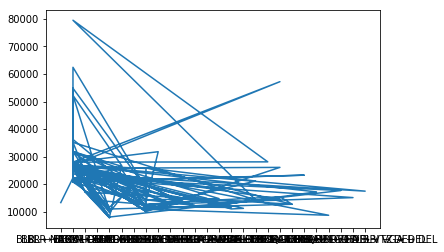

None
Airline            97
Date_of_Journey    97
Source             97
Destination        97
Route              97
Dep_Time           97
Arrival_Time       97
Duration           97
Total_Stops        97
Additional_Info    97
Price              97
dtype: int64


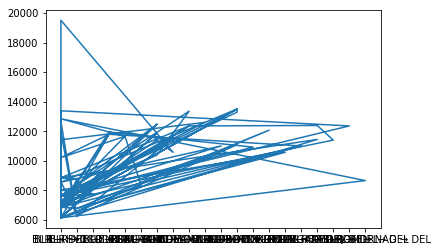

None
Airline            95
Date_of_Journey    95
Source             95
Destination        95
Route              95
Dep_Time           95
Arrival_Time       95
Duration           95
Total_Stops        95
Additional_Info    95
Price              95
dtype: int64


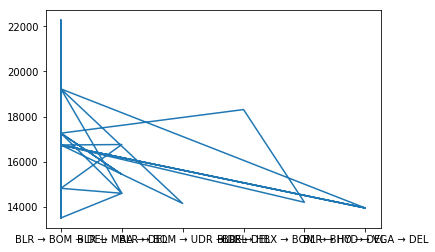

None
Airline            102
Date_of_Journey    102
Source             102
Destination        102
Route              102
Dep_Time           102
Arrival_Time       102
Duration           102
Total_Stops        102
Additional_Info    102
Price              102
dtype: int64


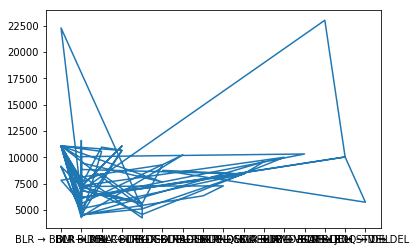

None
Airline            40
Date_of_Journey    40
Source             40
Destination        40
Route              40
Dep_Time           40
Arrival_Time       40
Duration           40
Total_Stops        40
Additional_Info    40
Price              40
dtype: int64


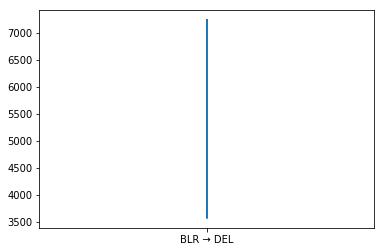

None
Airline            42
Date_of_Journey    42
Source             42
Destination        42
Route              42
Dep_Time           42
Arrival_Time       42
Duration           42
Total_Stops        42
Additional_Info    42
Price              42
dtype: int64


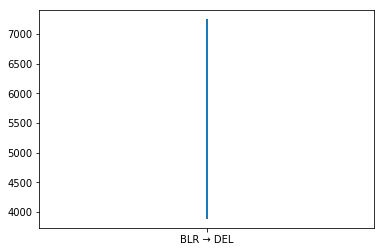

None
Airline            47
Date_of_Journey    47
Source             47
Destination        47
Route              47
Dep_Time           47
Arrival_Time       47
Duration           47
Total_Stops        47
Additional_Info    47
Price              47
dtype: int64


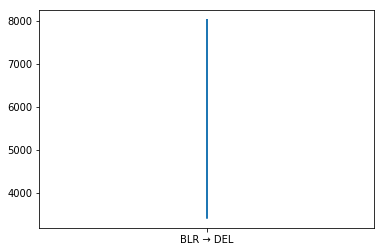

None
Airline            96
Date_of_Journey    96
Source             96
Destination        96
Route              96
Dep_Time           96
Arrival_Time       96
Duration           96
Total_Stops        96
Additional_Info    96
Price              96
dtype: int64


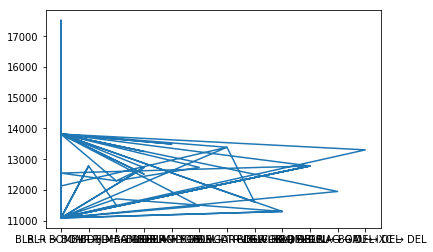

None
Airline            42
Date_of_Journey    42
Source             42
Destination        42
Route              42
Dep_Time           42
Arrival_Time       42
Duration           42
Total_Stops        42
Additional_Info    42
Price              42
dtype: int64


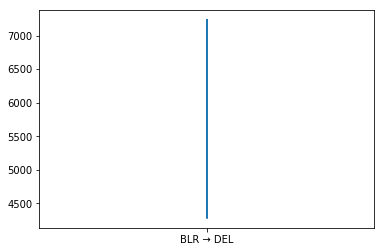

None
Airline            48
Date_of_Journey    48
Source             48
Destination        48
Route              48
Dep_Time           48
Arrival_Time       48
Duration           48
Total_Stops        48
Additional_Info    48
Price              48
dtype: int64


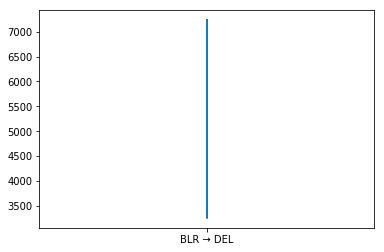

None
Airline            44
Date_of_Journey    44
Source             44
Destination        44
Route              44
Dep_Time           44
Arrival_Time       44
Duration           44
Total_Stops        44
Additional_Info    44
Price              44
dtype: int64


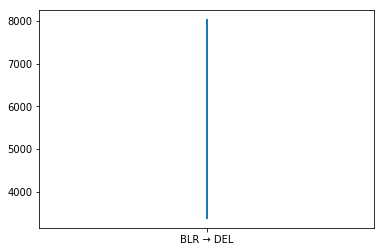

None
Airline            103
Date_of_Journey    103
Source             103
Destination        103
Route              103
Dep_Time           103
Arrival_Time       103
Duration           103
Total_Stops        103
Additional_Info    103
Price              103
dtype: int64


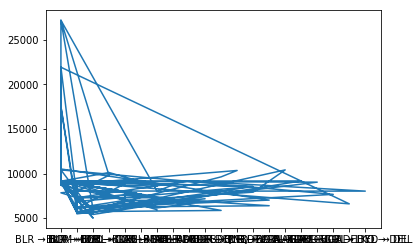

None
Airline            41
Date_of_Journey    41
Source             41
Destination        41
Route              41
Dep_Time           41
Arrival_Time       41
Duration           41
Total_Stops        41
Additional_Info    41
Price              41
dtype: int64


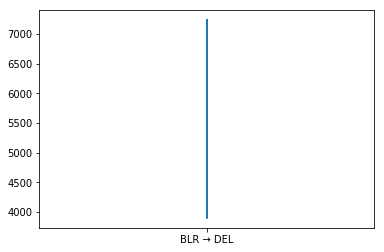

None
Airline            46
Date_of_Journey    46
Source             46
Destination        46
Route              46
Dep_Time           46
Arrival_Time       46
Duration           46
Total_Stops        46
Additional_Info    46
Price              46
dtype: int64


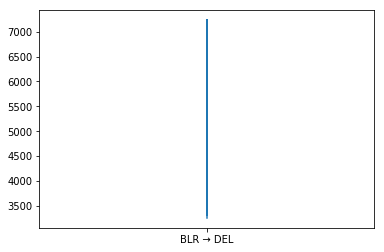

None
Airline            39
Date_of_Journey    39
Source             39
Destination        39
Route              39
Dep_Time           39
Arrival_Time       39
Duration           39
Total_Stops        39
Additional_Info    39
Price              39
dtype: int64


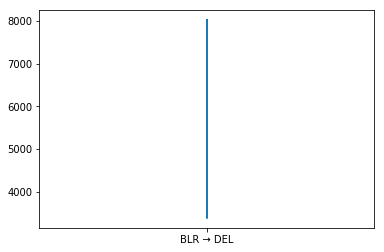

None
Airline            95
Date_of_Journey    95
Source             95
Destination        95
Route              95
Dep_Time           95
Arrival_Time       95
Duration           95
Total_Stops        95
Additional_Info    95
Price              95
dtype: int64


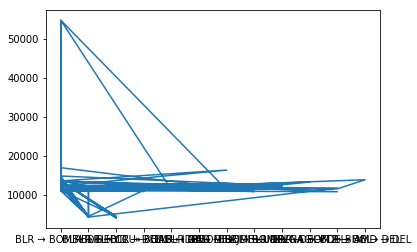

None
Airline            40
Date_of_Journey    40
Source             40
Destination        40
Route              40
Dep_Time           40
Arrival_Time       40
Duration           40
Total_Stops        40
Additional_Info    40
Price              40
dtype: int64


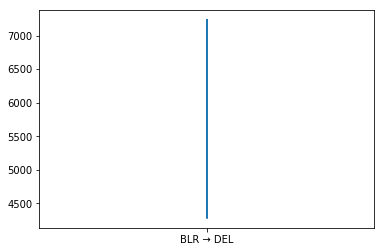

None
Airline            41
Date_of_Journey    41
Source             41
Destination        41
Route              41
Dep_Time           41
Arrival_Time       41
Duration           41
Total_Stops        41
Additional_Info    41
Price              41
dtype: int64


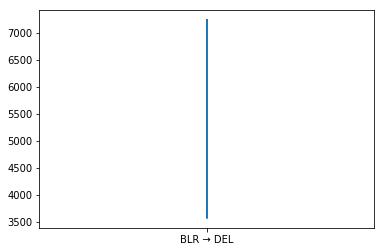

None
Airline            41
Date_of_Journey    41
Source             41
Destination        41
Route              41
Dep_Time           41
Arrival_Time       41
Duration           41
Total_Stops        41
Additional_Info    41
Price              41
dtype: int64


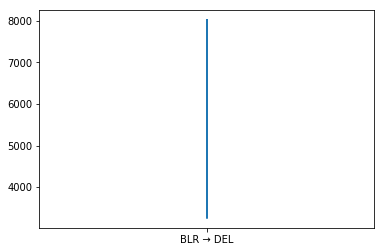

None
Airline            93
Date_of_Journey    93
Source             93
Destination        93
Route              93
Dep_Time           93
Arrival_Time       93
Duration           93
Total_Stops        93
Additional_Info    93
Price              93
dtype: int64


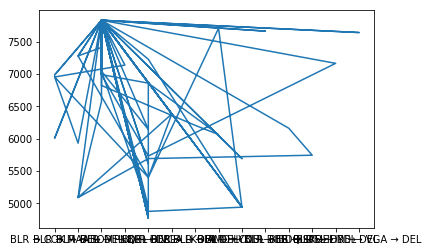

None
Airline            40
Date_of_Journey    40
Source             40
Destination        40
Route              40
Dep_Time           40
Arrival_Time       40
Duration           40
Total_Stops        40
Additional_Info    40
Price              40
dtype: int64


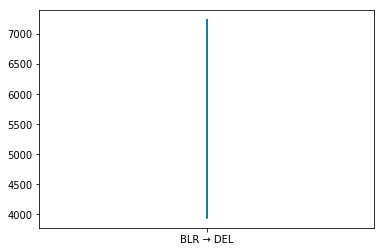

None
Airline            40
Date_of_Journey    40
Source             40
Destination        40
Route              40
Dep_Time           40
Arrival_Time       40
Duration           40
Total_Stops        40
Additional_Info    40
Price              40
dtype: int64


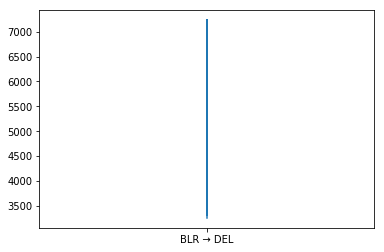

None
Airline            42
Date_of_Journey    42
Source             42
Destination        42
Route              42
Dep_Time           42
Arrival_Time       42
Duration           42
Total_Stops        42
Additional_Info    42
Price              42
dtype: int64


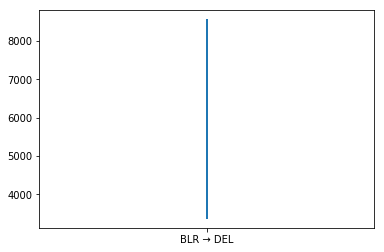

None
Airline            99
Date_of_Journey    99
Source             99
Destination        99
Route              99
Dep_Time           99
Arrival_Time       99
Duration           99
Total_Stops        99
Additional_Info    99
Price              99
dtype: int64


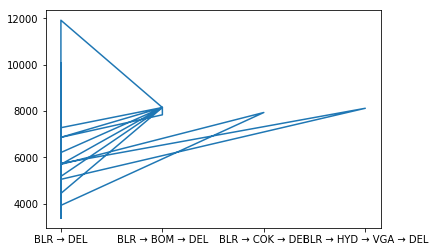

None
Airline            40
Date_of_Journey    40
Source             40
Destination        40
Route              40
Dep_Time           40
Arrival_Time       40
Duration           40
Total_Stops        40
Additional_Info    40
Price              40
dtype: int64


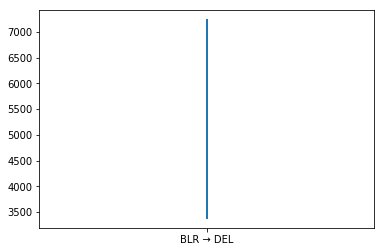

None
Airline            42
Date_of_Journey    42
Source             42
Destination        42
Route              42
Dep_Time           42
Arrival_Time       42
Duration           42
Total_Stops        42
Additional_Info    42
Price              42
dtype: int64


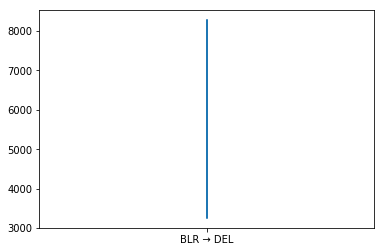

None
Airline            39
Date_of_Journey    39
Source             39
Destination        39
Route              39
Dep_Time           39
Arrival_Time       39
Duration           39
Total_Stops        39
Additional_Info    39
Price              39
dtype: int64


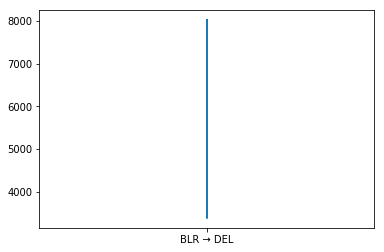

None
Airline            47
Date_of_Journey    47
Source             47
Destination        47
Route              47
Dep_Time           47
Arrival_Time       47
Duration           47
Total_Stops        47
Additional_Info    47
Price              47
dtype: int64


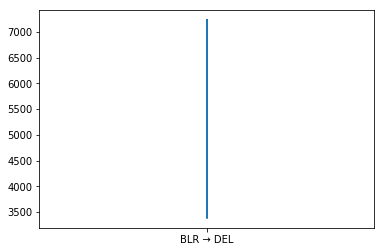

None
Airline            47
Date_of_Journey    47
Source             47
Destination        47
Route              47
Dep_Time           47
Arrival_Time       47
Duration           47
Total_Stops        47
Additional_Info    47
Price              47
dtype: int64


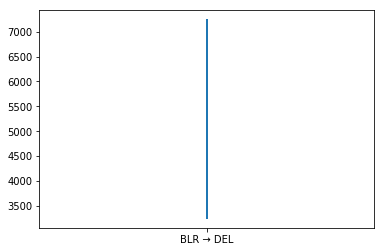

None
Airline            41
Date_of_Journey    41
Source             41
Destination        41
Route              41
Dep_Time           41
Arrival_Time       41
Duration           41
Total_Stops        41
Additional_Info    41
Price              41
dtype: int64


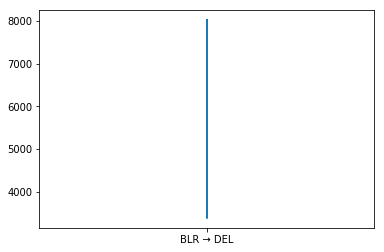

None
Airline            44
Date_of_Journey    44
Source             44
Destination        44
Route              44
Dep_Time           44
Arrival_Time       44
Duration           44
Total_Stops        44
Additional_Info    44
Price              44
dtype: int64


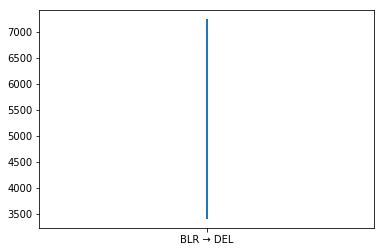

None
Airline            42
Date_of_Journey    42
Source             42
Destination        42
Route              42
Dep_Time           42
Arrival_Time       42
Duration           42
Total_Stops        42
Additional_Info    42
Price              42
dtype: int64


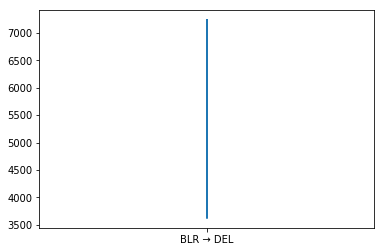

None
Airline            42
Date_of_Journey    42
Source             42
Destination        42
Route              42
Dep_Time           42
Arrival_Time       42
Duration           42
Total_Stops        42
Additional_Info    42
Price              42
dtype: int64


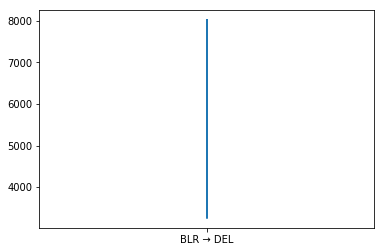

None
Airline            45
Date_of_Journey    45
Source             45
Destination        45
Route              45
Dep_Time           45
Arrival_Time       45
Duration           45
Total_Stops        45
Additional_Info    45
Price              45
dtype: int64


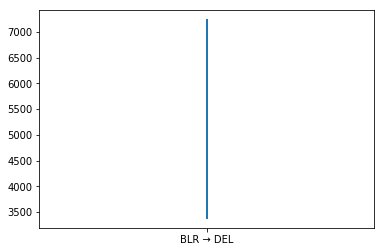

None
Airline            43
Date_of_Journey    43
Source             43
Destination        43
Route              43
Dep_Time           43
Arrival_Time       43
Duration           43
Total_Stops        43
Additional_Info    43
Price              43
dtype: int64


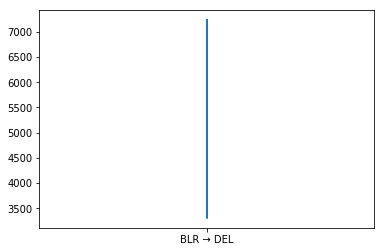

None
Airline            40
Date_of_Journey    40
Source             40
Destination        40
Route              40
Dep_Time           40
Arrival_Time       40
Duration           40
Total_Stops        40
Additional_Info    40
Price              40
dtype: int64


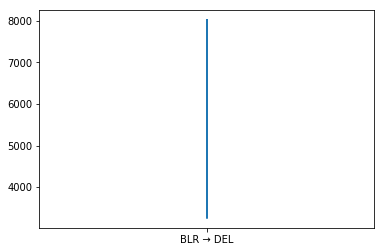

None
Airline            44
Date_of_Journey    44
Source             44
Destination        44
Route              44
Dep_Time           44
Arrival_Time       44
Duration           44
Total_Stops        44
Additional_Info    44
Price              44
dtype: int64


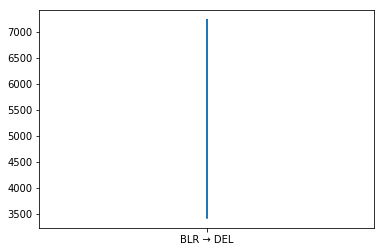

None
Airline            33
Date_of_Journey    33
Source             33
Destination        33
Route              33
Dep_Time           33
Arrival_Time       33
Duration           33
Total_Stops        33
Additional_Info    33
Price              33
dtype: int64


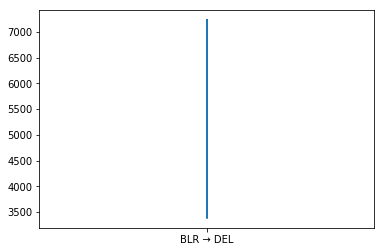

None
Airline            43
Date_of_Journey    43
Source             43
Destination        43
Route              43
Dep_Time           43
Arrival_Time       43
Duration           43
Total_Stops        43
Additional_Info    43
Price              43
dtype: int64


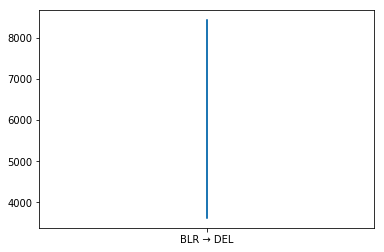

None
Airline            10
Date_of_Journey    10
Source             10
Destination        10
Route              10
Dep_Time           10
Arrival_Time       10
Duration           10
Total_Stops        10
Additional_Info    10
Price              10
dtype: int64


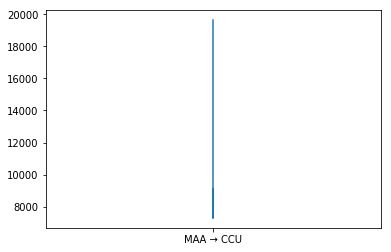

None
Airline            14
Date_of_Journey    14
Source             14
Destination        14
Route              14
Dep_Time           14
Arrival_Time       14
Duration           14
Total_Stops        14
Additional_Info    14
Price              14
dtype: int64


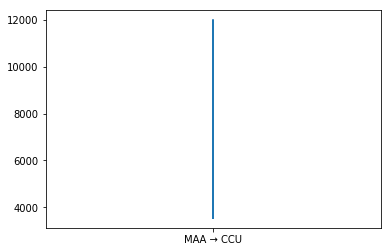

None
Airline            14
Date_of_Journey    14
Source             14
Destination        14
Route              14
Dep_Time           14
Arrival_Time       14
Duration           14
Total_Stops        14
Additional_Info    14
Price              14
dtype: int64


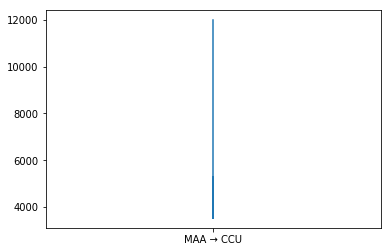

None
Airline            8
Date_of_Journey    8
Source             8
Destination        8
Route              8
Dep_Time           8
Arrival_Time       8
Duration           8
Total_Stops        8
Additional_Info    8
Price              8
dtype: int64


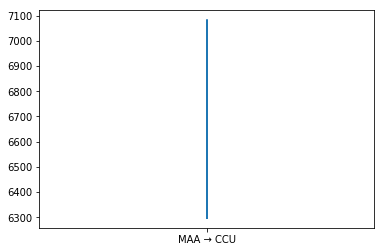

None
Airline            12
Date_of_Journey    12
Source             12
Destination        12
Route              12
Dep_Time           12
Arrival_Time       12
Duration           12
Total_Stops        12
Additional_Info    12
Price              12
dtype: int64


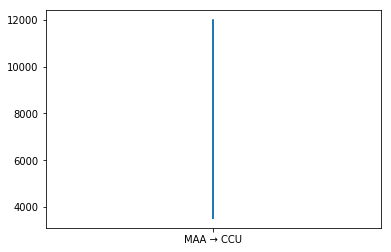

None
Airline            10
Date_of_Journey    10
Source             10
Destination        10
Route              10
Dep_Time           10
Arrival_Time       10
Duration           10
Total_Stops        10
Additional_Info    10
Price              10
dtype: int64


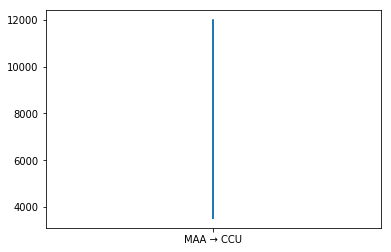

None
Airline            12
Date_of_Journey    12
Source             12
Destination        12
Route              12
Dep_Time           12
Arrival_Time       12
Duration           12
Total_Stops        12
Additional_Info    12
Price              12
dtype: int64


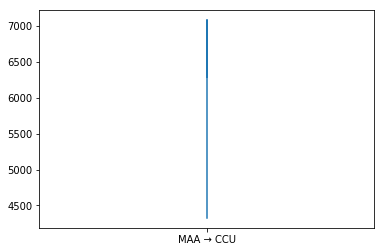

None
Airline            12
Date_of_Journey    12
Source             12
Destination        12
Route              12
Dep_Time           12
Arrival_Time       12
Duration           12
Total_Stops        12
Additional_Info    12
Price              12
dtype: int64


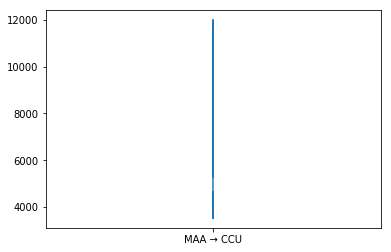

None
Airline            15
Date_of_Journey    15
Source             15
Destination        15
Route              15
Dep_Time           15
Arrival_Time       15
Duration           15
Total_Stops        15
Additional_Info    15
Price              15
dtype: int64


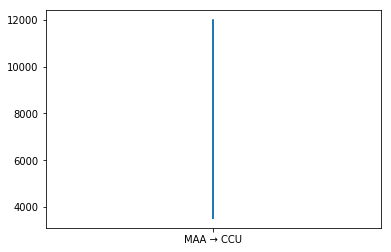

None
Airline            12
Date_of_Journey    12
Source             12
Destination        12
Route              12
Dep_Time           12
Arrival_Time       12
Duration           12
Total_Stops        12
Additional_Info    12
Price              12
dtype: int64


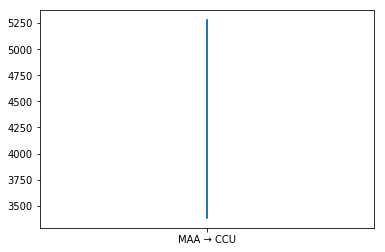

None
Airline            14
Date_of_Journey    14
Source             14
Destination        14
Route              14
Dep_Time           14
Arrival_Time       14
Duration           14
Total_Stops        14
Additional_Info    14
Price              14
dtype: int64


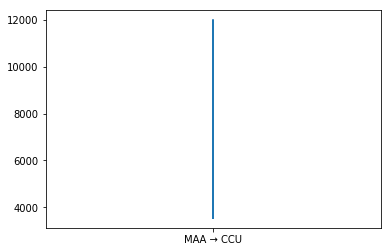

None
Airline            13
Date_of_Journey    13
Source             13
Destination        13
Route              13
Dep_Time           13
Arrival_Time       13
Duration           13
Total_Stops        13
Additional_Info    13
Price              13
dtype: int64


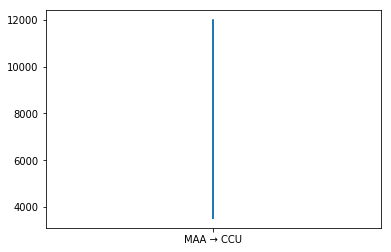

None
Airline            12
Date_of_Journey    12
Source             12
Destination        12
Route              12
Dep_Time           12
Arrival_Time       12
Duration           12
Total_Stops        12
Additional_Info    12
Price              12
dtype: int64


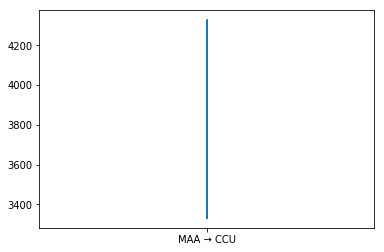

None
Airline            11
Date_of_Journey    11
Source             11
Destination        11
Route              11
Dep_Time           11
Arrival_Time       11
Duration           11
Total_Stops        11
Additional_Info    11
Price              11
dtype: int64


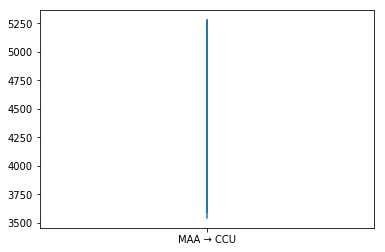

None
Airline            14
Date_of_Journey    14
Source             14
Destination        14
Route              14
Dep_Time           14
Arrival_Time       14
Duration           14
Total_Stops        14
Additional_Info    14
Price              14
dtype: int64


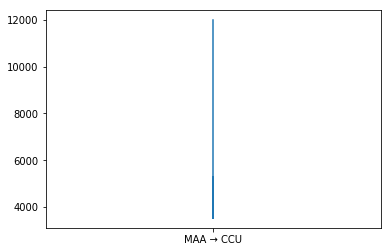

None
Airline            13
Date_of_Journey    13
Source             13
Destination        13
Route              13
Dep_Time           13
Arrival_Time       13
Duration           13
Total_Stops        13
Additional_Info    13
Price              13
dtype: int64


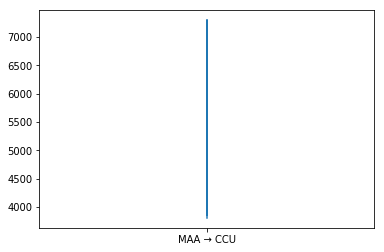

None
Airline            13
Date_of_Journey    13
Source             13
Destination        13
Route              13
Dep_Time           13
Arrival_Time       13
Duration           13
Total_Stops        13
Additional_Info    13
Price              13
dtype: int64


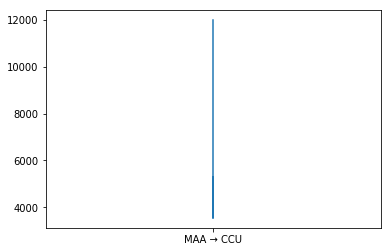

None
Airline            12
Date_of_Journey    12
Source             12
Destination        12
Route              12
Dep_Time           12
Arrival_Time       12
Duration           12
Total_Stops        12
Additional_Info    12
Price              12
dtype: int64


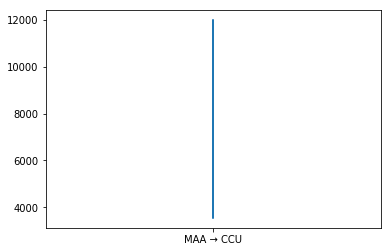

None
Airline            15
Date_of_Journey    15
Source             15
Destination        15
Route              15
Dep_Time           15
Arrival_Time       15
Duration           15
Total_Stops        15
Additional_Info    15
Price              15
dtype: int64


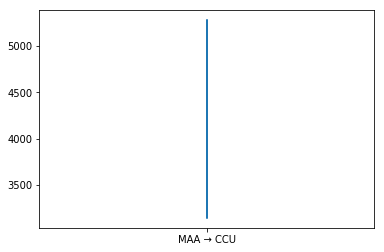

None
Airline            14
Date_of_Journey    14
Source             14
Destination        14
Route              14
Dep_Time           14
Arrival_Time       14
Duration           14
Total_Stops        14
Additional_Info    14
Price              14
dtype: int64


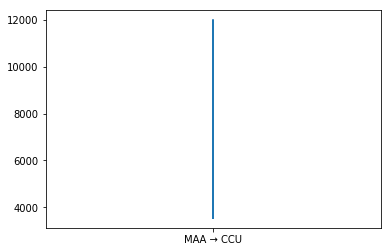

None
Airline            15
Date_of_Journey    15
Source             15
Destination        15
Route              15
Dep_Time           15
Arrival_Time       15
Duration           15
Total_Stops        15
Additional_Info    15
Price              15
dtype: int64


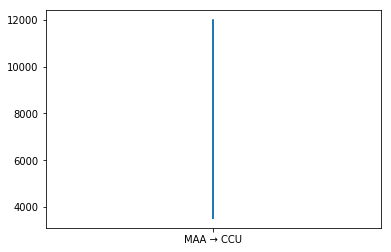

None
Airline            11
Date_of_Journey    11
Source             11
Destination        11
Route              11
Dep_Time           11
Arrival_Time       11
Duration           11
Total_Stops        11
Additional_Info    11
Price              11
dtype: int64


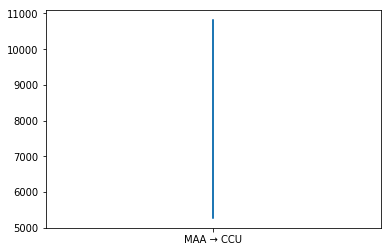

None
Airline            15
Date_of_Journey    15
Source             15
Destination        15
Route              15
Dep_Time           15
Arrival_Time       15
Duration           15
Total_Stops        15
Additional_Info    15
Price              15
dtype: int64


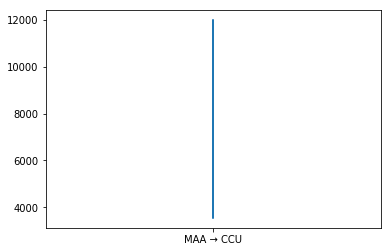

None
Airline            13
Date_of_Journey    13
Source             13
Destination        13
Route              13
Dep_Time           13
Arrival_Time       13
Duration           13
Total_Stops        13
Additional_Info    13
Price              13
dtype: int64


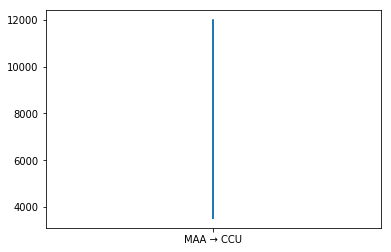

None
Airline            11
Date_of_Journey    11
Source             11
Destination        11
Route              11
Dep_Time           11
Arrival_Time       11
Duration           11
Total_Stops        11
Additional_Info    11
Price              11
dtype: int64


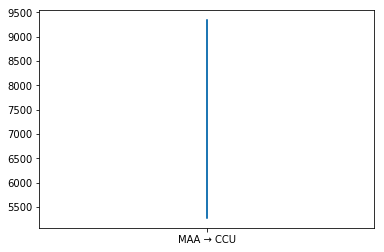

None
Airline            13
Date_of_Journey    13
Source             13
Destination        13
Route              13
Dep_Time           13
Arrival_Time       13
Duration           13
Total_Stops        13
Additional_Info    13
Price              13
dtype: int64


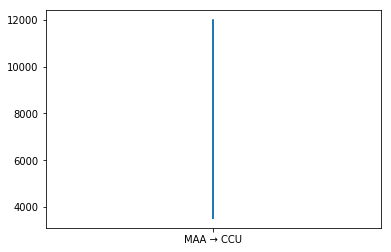

None
Airline            14
Date_of_Journey    14
Source             14
Destination        14
Route              14
Dep_Time           14
Arrival_Time       14
Duration           14
Total_Stops        14
Additional_Info    14
Price              14
dtype: int64


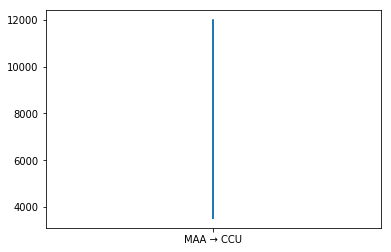

None
Airline            12
Date_of_Journey    12
Source             12
Destination        12
Route              12
Dep_Time           12
Arrival_Time       12
Duration           12
Total_Stops        12
Additional_Info    12
Price              12
dtype: int64


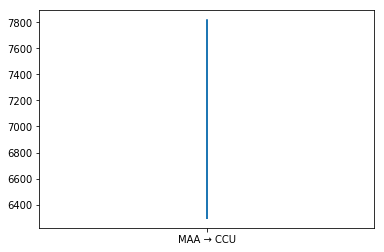

None
Airline            13
Date_of_Journey    13
Source             13
Destination        13
Route              13
Dep_Time           13
Arrival_Time       13
Duration           13
Total_Stops        13
Additional_Info    13
Price              13
dtype: int64


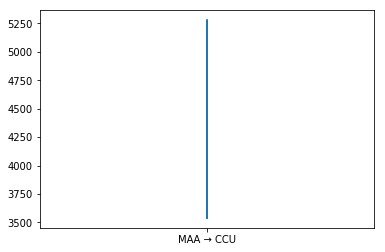

None
Airline            14
Date_of_Journey    14
Source             14
Destination        14
Route              14
Dep_Time           14
Arrival_Time       14
Duration           14
Total_Stops        14
Additional_Info    14
Price              14
dtype: int64


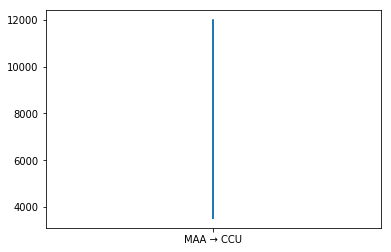

None
Airline            9
Date_of_Journey    9
Source             9
Destination        9
Route              9
Dep_Time           9
Arrival_Time       9
Duration           9
Total_Stops        9
Additional_Info    9
Price              9
dtype: int64


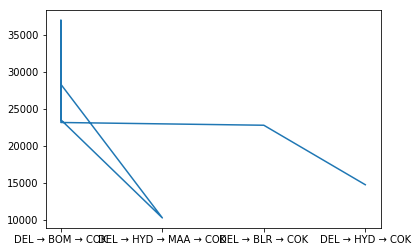

None
Airline            24
Date_of_Journey    24
Source             24
Destination        24
Route              24
Dep_Time           24
Arrival_Time       24
Duration           24
Total_Stops        24
Additional_Info    24
Price              24
dtype: int64


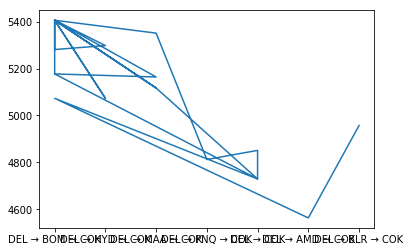

None
Airline            17
Date_of_Journey    17
Source             17
Destination        17
Route              17
Dep_Time           17
Arrival_Time       17
Duration           17
Total_Stops        17
Additional_Info    17
Price              17
dtype: int64


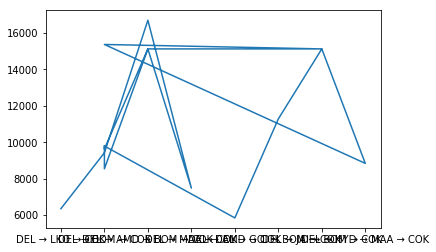

None
Airline            242
Date_of_Journey    242
Source             242
Destination        242
Route              242
Dep_Time           242
Arrival_Time       242
Duration           242
Total_Stops        242
Additional_Info    242
Price              242
dtype: int64


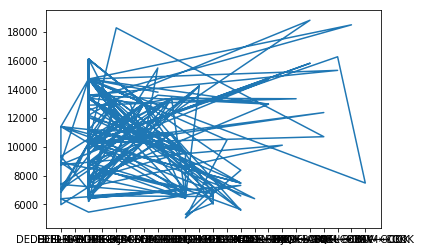

None
Airline            9
Date_of_Journey    9
Source             9
Destination        9
Route              9
Dep_Time           9
Arrival_Time       9
Duration           9
Total_Stops        9
Additional_Info    9
Price              9
dtype: int64


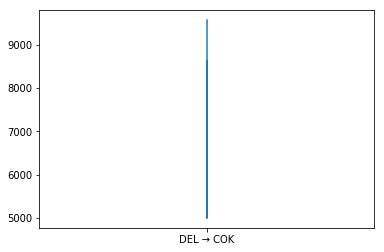

None
Airline            241
Date_of_Journey    241
Source             241
Destination        241
Route              241
Dep_Time           241
Arrival_Time       241
Duration           241
Total_Stops        241
Additional_Info    241
Price              241
dtype: int64


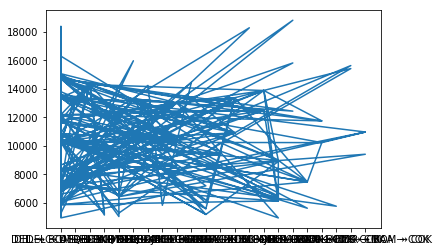

None
Airline            6
Date_of_Journey    6
Source             6
Destination        6
Route              6
Dep_Time           6
Arrival_Time       6
Duration           6
Total_Stops        6
Additional_Info    6
Price              6
dtype: int64


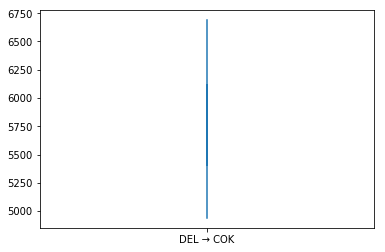

None
Airline            24
Date_of_Journey    24
Source             24
Destination        24
Route              24
Dep_Time           24
Arrival_Time       24
Duration           24
Total_Stops        24
Additional_Info    24
Price              24
dtype: int64


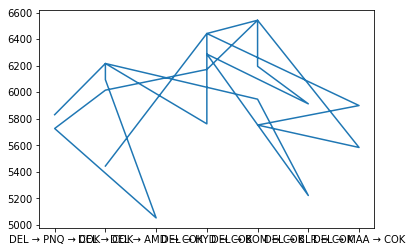

None
Airline            158
Date_of_Journey    158
Source             158
Destination        158
Route              158
Dep_Time           158
Arrival_Time       158
Duration           158
Total_Stops        158
Additional_Info    158
Price              158
dtype: int64


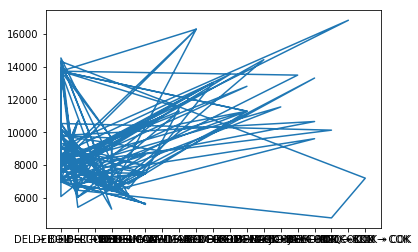

None
Airline            231
Date_of_Journey    231
Source             231
Destination        231
Route              231
Dep_Time           231
Arrival_Time       231
Duration           231
Total_Stops        231
Additional_Info    231
Price              231
dtype: int64


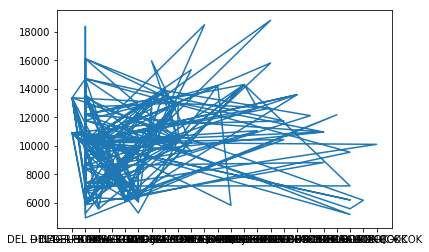

None
Airline            6
Date_of_Journey    6
Source             6
Destination        6
Route              6
Dep_Time           6
Arrival_Time       6
Duration           6
Total_Stops        6
Additional_Info    6
Price              6
dtype: int64


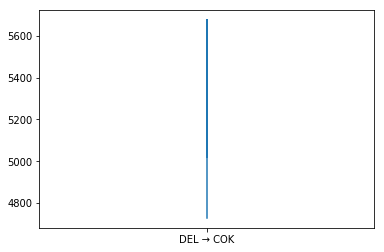

None
Airline            9
Date_of_Journey    9
Source             9
Destination        9
Route              9
Dep_Time           9
Arrival_Time       9
Duration           9
Total_Stops        9
Additional_Info    9
Price              9
dtype: int64


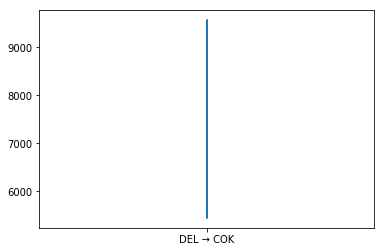

None
Airline            247
Date_of_Journey    247
Source             247
Destination        247
Route              247
Dep_Time           247
Arrival_Time       247
Duration           247
Total_Stops        247
Additional_Info    247
Price              247
dtype: int64


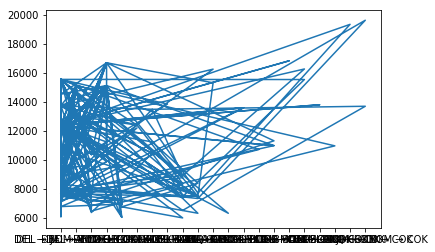

None
Airline            8
Date_of_Journey    8
Source             8
Destination        8
Route              8
Dep_Time           8
Arrival_Time       8
Duration           8
Total_Stops        8
Additional_Info    8
Price              8
dtype: int64


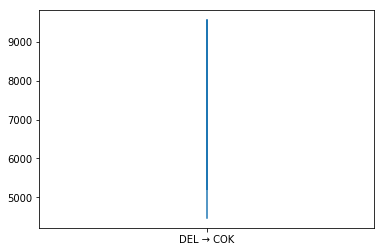

None
Airline            275
Date_of_Journey    275
Source             275
Destination        275
Route              275
Dep_Time           275
Arrival_Time       275
Duration           275
Total_Stops        275
Additional_Info    275
Price              275
dtype: int64


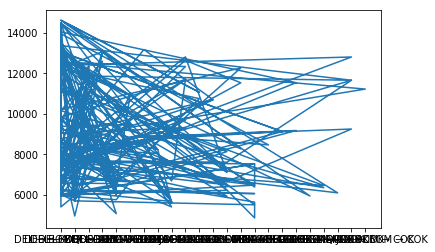

None
Airline            22
Date_of_Journey    22
Source             22
Destination        22
Route              22
Dep_Time           22
Arrival_Time       22
Duration           22
Total_Stops        22
Additional_Info    22
Price              22
dtype: int64


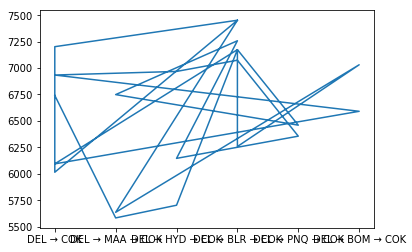

None
Airline            239
Date_of_Journey    239
Source             239
Destination        239
Route              239
Dep_Time           239
Arrival_Time       239
Duration           239
Total_Stops        239
Additional_Info    239
Price              239
dtype: int64


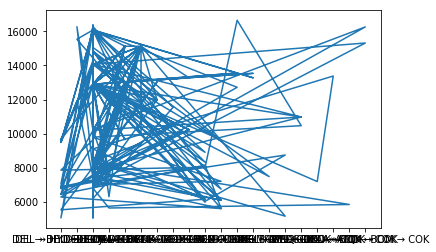

None
Airline            10
Date_of_Journey    10
Source             10
Destination        10
Route              10
Dep_Time           10
Arrival_Time       10
Duration           10
Total_Stops        10
Additional_Info    10
Price              10
dtype: int64


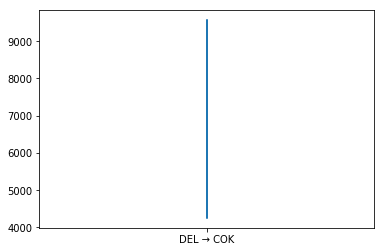

None
Airline            1
Date_of_Journey    1
Source             1
Destination        1
Route              1
Dep_Time           1
Arrival_Time       1
Duration           1
Total_Stops        1
Additional_Info    1
Price              1
dtype: int64


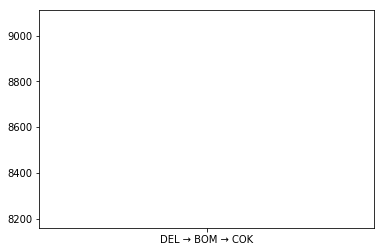

None
Airline            27
Date_of_Journey    27
Source             27
Destination        27
Route              27
Dep_Time           27
Arrival_Time       27
Duration           27
Total_Stops        27
Additional_Info    27
Price              27
dtype: int64


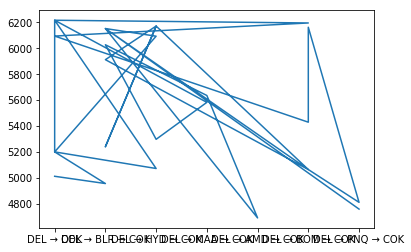

None
Airline            23
Date_of_Journey    23
Source             23
Destination        23
Route              23
Dep_Time           23
Arrival_Time       23
Duration           23
Total_Stops        23
Additional_Info    23
Price              23
dtype: int64


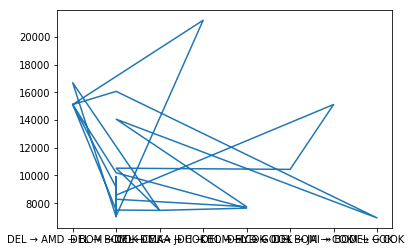

None
Airline            260
Date_of_Journey    260
Source             260
Destination        260
Route              260
Dep_Time           260
Arrival_Time       260
Duration           260
Total_Stops        260
Additional_Info    260
Price              260
dtype: int64


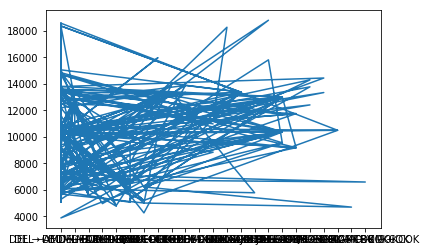

None
Airline            243
Date_of_Journey    243
Source             243
Destination        243
Route              243
Dep_Time           243
Arrival_Time       243
Duration           243
Total_Stops        243
Additional_Info    243
Price              243
dtype: int64


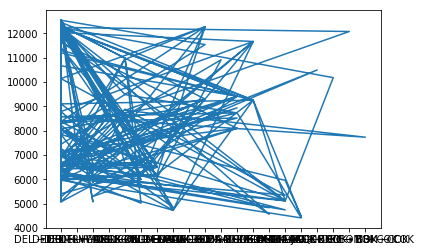

None
Airline            27
Date_of_Journey    27
Source             27
Destination        27
Route              27
Dep_Time           27
Arrival_Time       27
Duration           27
Total_Stops        27
Additional_Info    27
Price              27
dtype: int64


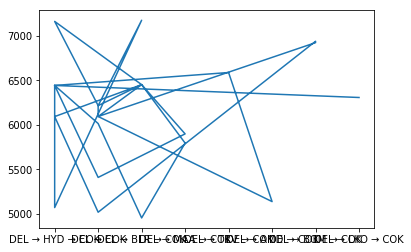

None
Airline            281
Date_of_Journey    281
Source             281
Destination        281
Route              281
Dep_Time           281
Arrival_Time       281
Duration           281
Total_Stops        281
Additional_Info    281
Price              281
dtype: int64


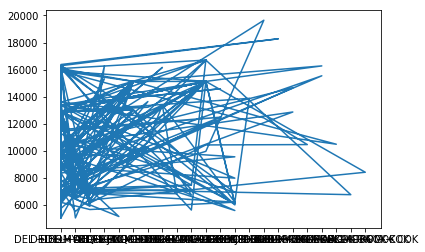

None
Airline            257
Date_of_Journey    257
Source             257
Destination        257
Route              257
Dep_Time           257
Arrival_Time       257
Duration           257
Total_Stops        257
Additional_Info    257
Price              257
dtype: int64


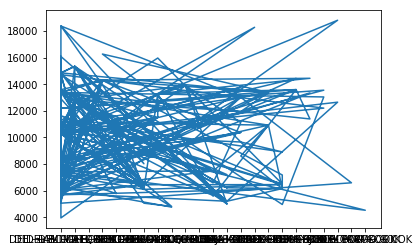

None
Airline            176
Date_of_Journey    176
Source             176
Destination        176
Route              176
Dep_Time           176
Arrival_Time       176
Duration           176
Total_Stops        176
Additional_Info    176
Price              176
dtype: int64


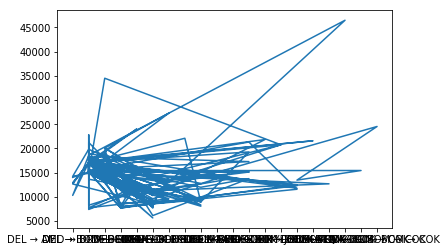

None
Airline            24
Date_of_Journey    24
Source             24
Destination        24
Route              24
Dep_Time           24
Arrival_Time       24
Duration           24
Total_Stops        24
Additional_Info    24
Price              24
dtype: int64


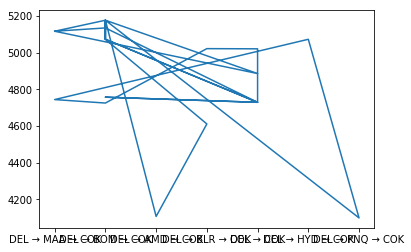

None
Airline            240
Date_of_Journey    240
Source             240
Destination        240
Route              240
Dep_Time           240
Arrival_Time       240
Duration           240
Total_Stops        240
Additional_Info    240
Price              240
dtype: int64


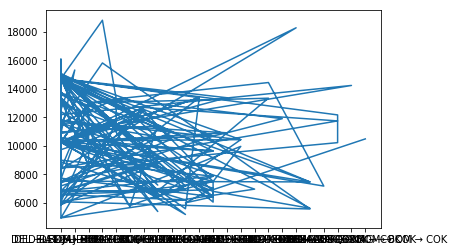

None
Airline            219
Date_of_Journey    219
Source             219
Destination        219
Route              219
Dep_Time           219
Arrival_Time       219
Duration           219
Total_Stops        219
Additional_Info    219
Price              219
dtype: int64


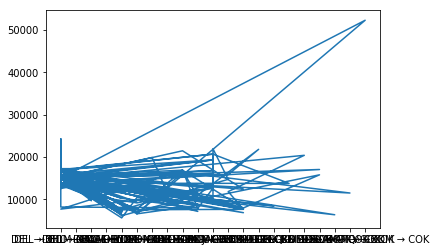

None
Airline            28
Date_of_Journey    28
Source             28
Destination        28
Route              28
Dep_Time           28
Arrival_Time       28
Duration           28
Total_Stops        28
Additional_Info    28
Price              28
dtype: int64


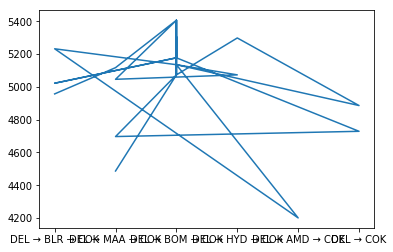

None
Airline            23
Date_of_Journey    23
Source             23
Destination        23
Route              23
Dep_Time           23
Arrival_Time       23
Duration           23
Total_Stops        23
Additional_Info    23
Price              23
dtype: int64


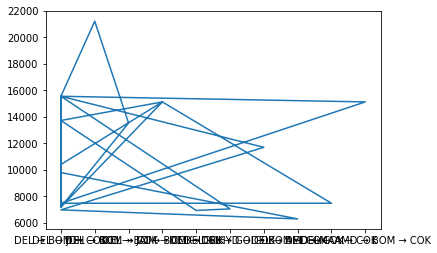

None
Airline            246
Date_of_Journey    246
Source             246
Destination        246
Route              246
Dep_Time           246
Arrival_Time       246
Duration           246
Total_Stops        246
Additional_Info    246
Price              246
dtype: int64


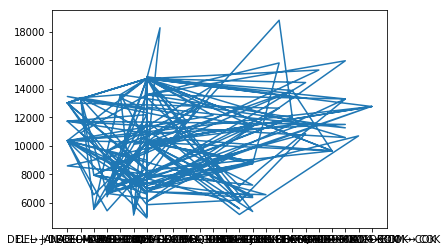

None
Airline            159
Date_of_Journey    159
Source             159
Destination        159
Route              159
Dep_Time           159
Arrival_Time       159
Duration           159
Total_Stops        159
Additional_Info    159
Price              159
dtype: int64


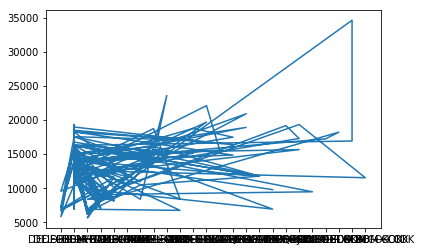

None
Airline            56
Date_of_Journey    56
Source             56
Destination        56
Route              56
Dep_Time           56
Arrival_Time       56
Duration           56
Total_Stops        56
Additional_Info    56
Price              56
dtype: int64


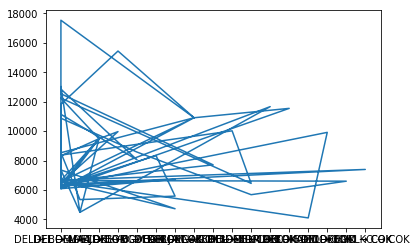

None
Airline            242
Date_of_Journey    242
Source             242
Destination        242
Route              242
Dep_Time           242
Arrival_Time       242
Duration           242
Total_Stops        242
Additional_Info    242
Price              242
dtype: int64


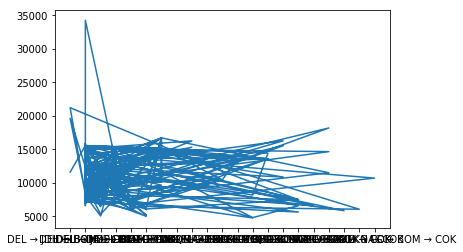

None
Airline            228
Date_of_Journey    228
Source             228
Destination        228
Route              228
Dep_Time           228
Arrival_Time       228
Duration           228
Total_Stops        228
Additional_Info    228
Price              228
dtype: int64


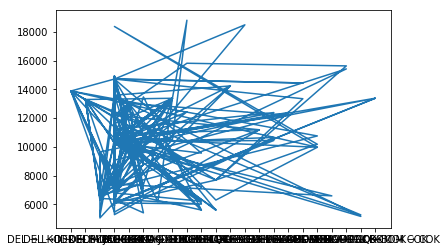

None
Airline            15
Date_of_Journey    15
Source             15
Destination        15
Route              15
Dep_Time           15
Arrival_Time       15
Duration           15
Total_Stops        15
Additional_Info    15
Price              15
dtype: int64


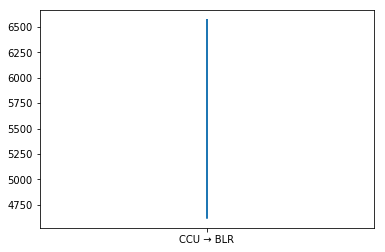

None
Airline            176
Date_of_Journey    176
Source             176
Destination        176
Route              176
Dep_Time           176
Arrival_Time       176
Duration           176
Total_Stops        176
Additional_Info    176
Price              176
dtype: int64


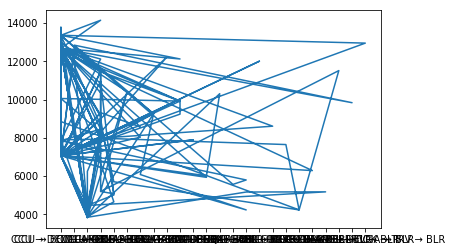

None
Airline            183
Date_of_Journey    183
Source             183
Destination        183
Route              183
Dep_Time           183
Arrival_Time       183
Duration           183
Total_Stops        183
Additional_Info    183
Price              183
dtype: int64


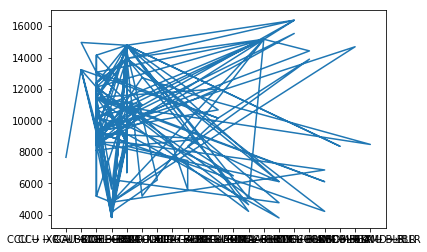

None
Airline            18
Date_of_Journey    18
Source             18
Destination        18
Route              18
Dep_Time           18
Arrival_Time       18
Duration           18
Total_Stops        18
Additional_Info    18
Price              18
dtype: int64


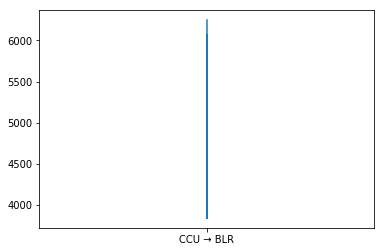

None
Airline            10
Date_of_Journey    10
Source             10
Destination        10
Route              10
Dep_Time           10
Arrival_Time       10
Duration           10
Total_Stops        10
Additional_Info    10
Price              10
dtype: int64


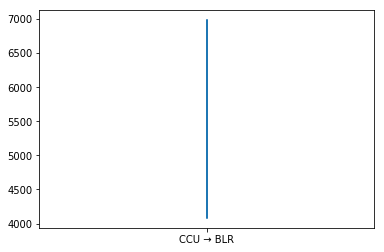

None
Airline            21
Date_of_Journey    21
Source             21
Destination        21
Route              21
Dep_Time           21
Arrival_Time       21
Duration           21
Total_Stops        21
Additional_Info    21
Price              21
dtype: int64


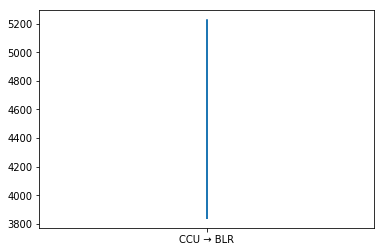

None
Airline            167
Date_of_Journey    167
Source             167
Destination        167
Route              167
Dep_Time           167
Arrival_Time       167
Duration           167
Total_Stops        167
Additional_Info    167
Price              167
dtype: int64


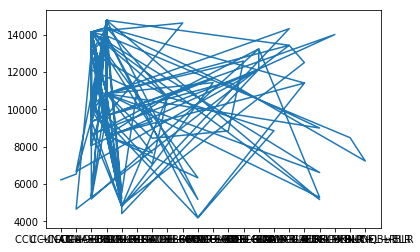

None
Airline            179
Date_of_Journey    179
Source             179
Destination        179
Route              179
Dep_Time           179
Arrival_Time       179
Duration           179
Total_Stops        179
Additional_Info    179
Price              179
dtype: int64


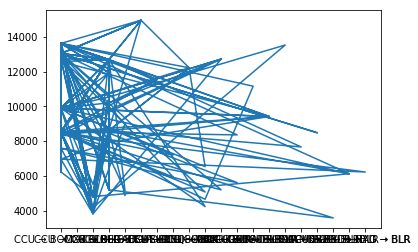

None
Airline            17
Date_of_Journey    17
Source             17
Destination        17
Route              17
Dep_Time           17
Arrival_Time       17
Duration           17
Total_Stops        17
Additional_Info    17
Price              17
dtype: int64


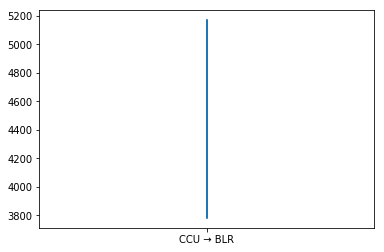

None
Airline            24
Date_of_Journey    24
Source             24
Destination        24
Route              24
Dep_Time           24
Arrival_Time       24
Duration           24
Total_Stops        24
Additional_Info    24
Price              24
dtype: int64


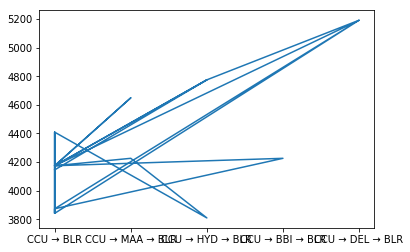

None
Airline            174
Date_of_Journey    174
Source             174
Destination        174
Route              174
Dep_Time           174
Arrival_Time       174
Duration           174
Total_Stops        174
Additional_Info    174
Price              174
dtype: int64


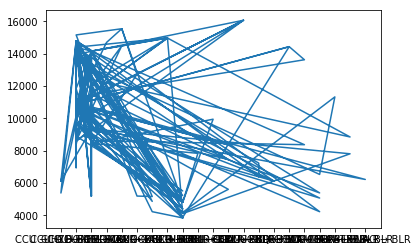

None
Airline            23
Date_of_Journey    23
Source             23
Destination        23
Route              23
Dep_Time           23
Arrival_Time       23
Duration           23
Total_Stops        23
Additional_Info    23
Price              23
dtype: int64


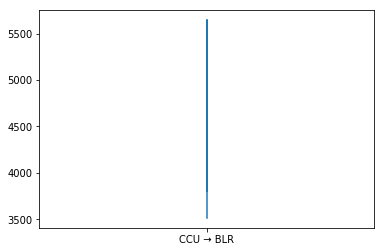

None
Airline            17
Date_of_Journey    17
Source             17
Destination        17
Route              17
Dep_Time           17
Arrival_Time       17
Duration           17
Total_Stops        17
Additional_Info    17
Price              17
dtype: int64


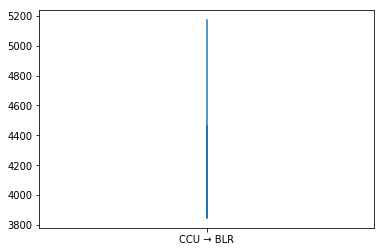

None
Airline            18
Date_of_Journey    18
Source             18
Destination        18
Route              18
Dep_Time           18
Arrival_Time       18
Duration           18
Total_Stops        18
Additional_Info    18
Price              18
dtype: int64


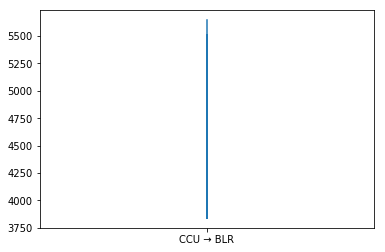

None
Airline            183
Date_of_Journey    183
Source             183
Destination        183
Route              183
Dep_Time           183
Arrival_Time       183
Duration           183
Total_Stops        183
Additional_Info    183
Price              183
dtype: int64


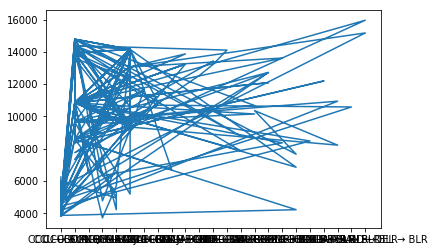

None
Airline            17
Date_of_Journey    17
Source             17
Destination        17
Route              17
Dep_Time           17
Arrival_Time       17
Duration           17
Total_Stops        17
Additional_Info    17
Price              17
dtype: int64


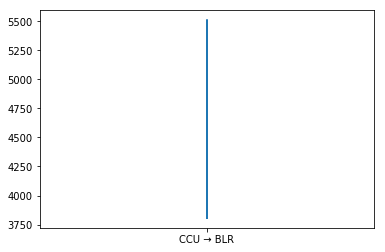

None
Airline            21
Date_of_Journey    21
Source             21
Destination        21
Route              21
Dep_Time           21
Arrival_Time       21
Duration           21
Total_Stops        21
Additional_Info    21
Price              21
dtype: int64


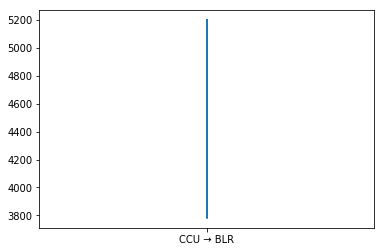

None
Airline            20
Date_of_Journey    20
Source             20
Destination        20
Route              20
Dep_Time           20
Arrival_Time       20
Duration           20
Total_Stops        20
Additional_Info    20
Price              20
dtype: int64


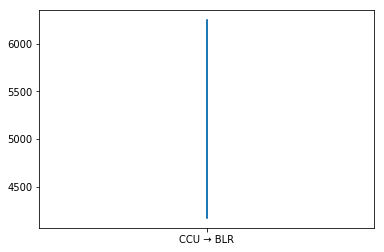

None
Airline            184
Date_of_Journey    184
Source             184
Destination        184
Route              184
Dep_Time           184
Arrival_Time       184
Duration           184
Total_Stops        184
Additional_Info    184
Price              184
dtype: int64


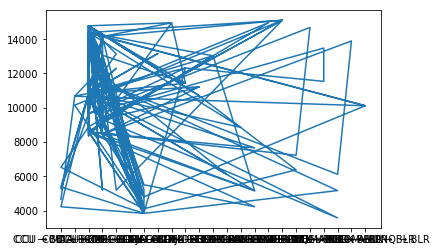

None
Airline            20
Date_of_Journey    20
Source             20
Destination        20
Route              20
Dep_Time           20
Arrival_Time       20
Duration           20
Total_Stops        20
Additional_Info    20
Price              20
dtype: int64


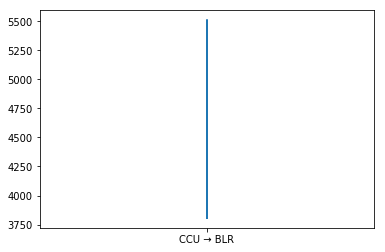

None
Airline            187
Date_of_Journey    187
Source             187
Destination        187
Route              187
Dep_Time           187
Arrival_Time       187
Duration           187
Total_Stops        187
Additional_Info    187
Price              187
dtype: int64


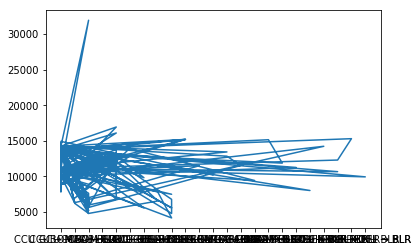

None
Airline            25
Date_of_Journey    25
Source             25
Destination        25
Route              25
Dep_Time           25
Arrival_Time       25
Duration           25
Total_Stops        25
Additional_Info    25
Price              25
dtype: int64


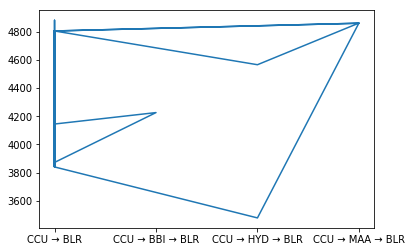

None
Airline            186
Date_of_Journey    186
Source             186
Destination        186
Route              186
Dep_Time           186
Arrival_Time       186
Duration           186
Total_Stops        186
Additional_Info    186
Price              186
dtype: int64


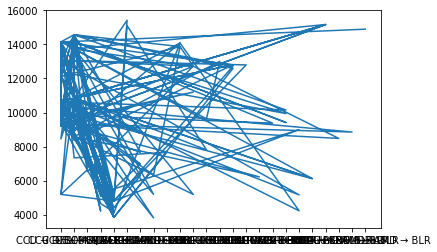

None
Airline            20
Date_of_Journey    20
Source             20
Destination        20
Route              20
Dep_Time           20
Arrival_Time       20
Duration           20
Total_Stops        20
Additional_Info    20
Price              20
dtype: int64


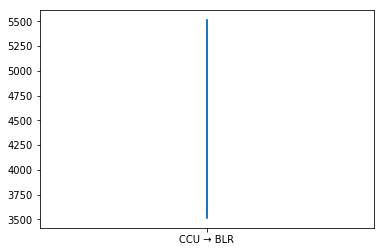

None
Airline            19
Date_of_Journey    19
Source             19
Destination        19
Route              19
Dep_Time           19
Arrival_Time       19
Duration           19
Total_Stops        19
Additional_Info    19
Price              19
dtype: int64


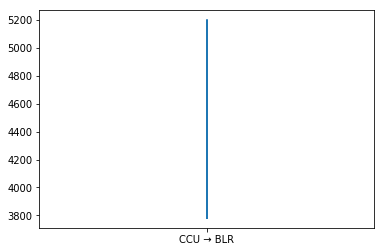

None
Airline            20
Date_of_Journey    20
Source             20
Destination        20
Route              20
Dep_Time           20
Arrival_Time       20
Duration           20
Total_Stops        20
Additional_Info    20
Price              20
dtype: int64


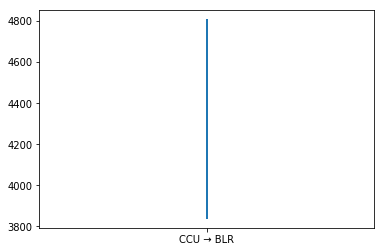

None
Airline            19
Date_of_Journey    19
Source             19
Destination        19
Route              19
Dep_Time           19
Arrival_Time       19
Duration           19
Total_Stops        19
Additional_Info    19
Price              19
dtype: int64


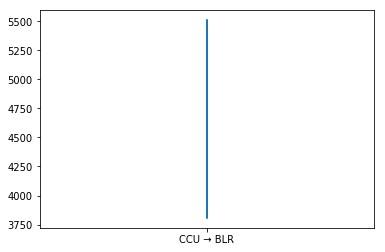

None
Airline            21
Date_of_Journey    21
Source             21
Destination        21
Route              21
Dep_Time           21
Arrival_Time       21
Duration           21
Total_Stops        21
Additional_Info    21
Price              21
dtype: int64


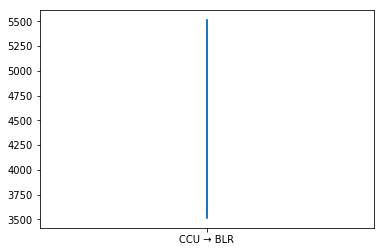

None
Airline            14
Date_of_Journey    14
Source             14
Destination        14
Route              14
Dep_Time           14
Arrival_Time       14
Duration           14
Total_Stops        14
Additional_Info    14
Price              14
dtype: int64


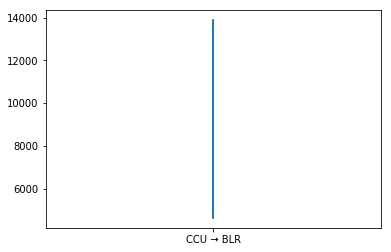

None
Airline            20
Date_of_Journey    20
Source             20
Destination        20
Route              20
Dep_Time           20
Arrival_Time       20
Duration           20
Total_Stops        20
Additional_Info    20
Price              20
dtype: int64


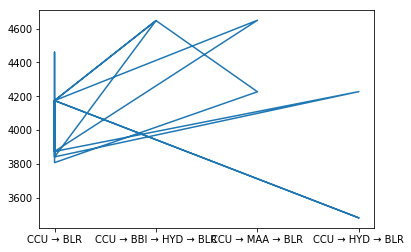

None
Airline            18
Date_of_Journey    18
Source             18
Destination        18
Route              18
Dep_Time           18
Arrival_Time       18
Duration           18
Total_Stops        18
Additional_Info    18
Price              18
dtype: int64


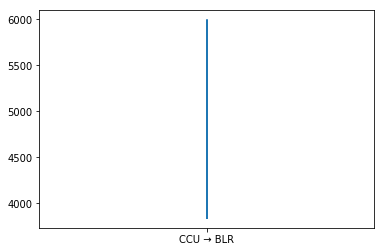

None
Airline            20
Date_of_Journey    20
Source             20
Destination        20
Route              20
Dep_Time           20
Arrival_Time       20
Duration           20
Total_Stops        20
Additional_Info    20
Price              20
dtype: int64


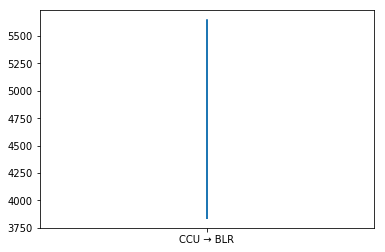

None
Airline            17
Date_of_Journey    17
Source             17
Destination        17
Route              17
Dep_Time           17
Arrival_Time       17
Duration           17
Total_Stops        17
Additional_Info    17
Price              17
dtype: int64


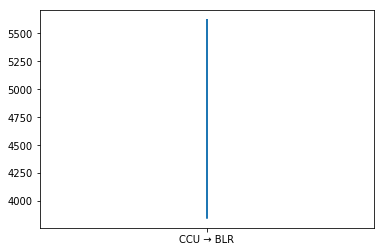

None
Airline            27
Date_of_Journey    27
Source             27
Destination        27
Route              27
Dep_Time           27
Arrival_Time       27
Duration           27
Total_Stops        27
Additional_Info    27
Price              27
dtype: int64


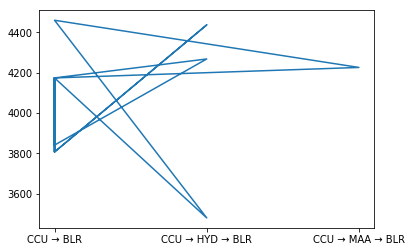

None
Airline            182
Date_of_Journey    182
Source             182
Destination        182
Route              182
Dep_Time           182
Arrival_Time       182
Duration           182
Total_Stops        182
Additional_Info    182
Price              182
dtype: int64


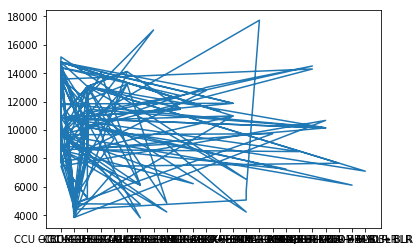

None
Airline            182
Date_of_Journey    182
Source             182
Destination        182
Route              182
Dep_Time           182
Arrival_Time       182
Duration           182
Total_Stops        182
Additional_Info    182
Price              182
dtype: int64


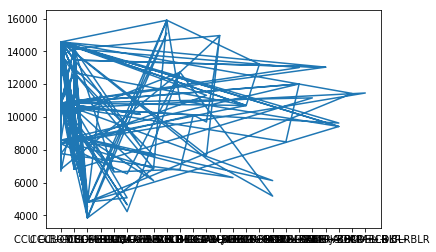

None
Airline            18
Date_of_Journey    18
Source             18
Destination        18
Route              18
Dep_Time           18
Arrival_Time       18
Duration           18
Total_Stops        18
Additional_Info    18
Price              18
dtype: int64


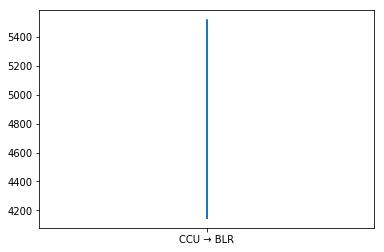

None
Airline            25
Date_of_Journey    25
Source             25
Destination        25
Route              25
Dep_Time           25
Arrival_Time       25
Duration           25
Total_Stops        25
Additional_Info    25
Price              25
dtype: int64


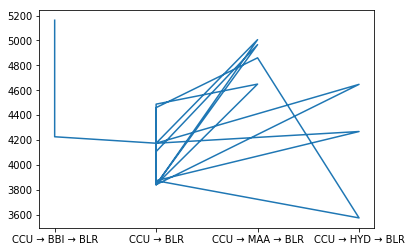

None
Airline            174
Date_of_Journey    174
Source             174
Destination        174
Route              174
Dep_Time           174
Arrival_Time       174
Duration           174
Total_Stops        174
Additional_Info    174
Price              174
dtype: int64


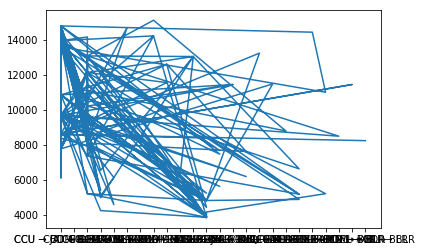

None
Airline            190
Date_of_Journey    190
Source             190
Destination        190
Route              190
Dep_Time           190
Arrival_Time       190
Duration           190
Total_Stops        190
Additional_Info    190
Price              190
dtype: int64


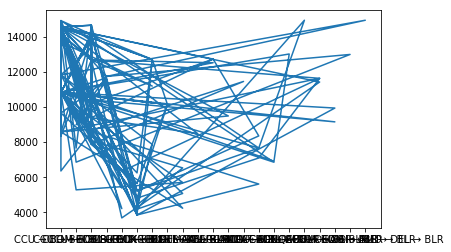

None
Airline            13
Date_of_Journey    13
Source             13
Destination        13
Route              13
Dep_Time           13
Arrival_Time       13
Duration           13
Total_Stops        13
Additional_Info    13
Price              13
dtype: int64


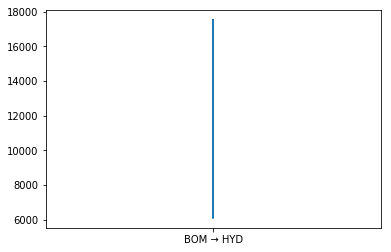

None
Airline            17
Date_of_Journey    17
Source             17
Destination        17
Route              17
Dep_Time           17
Arrival_Time       17
Duration           17
Total_Stops        17
Additional_Info    17
Price              17
dtype: int64


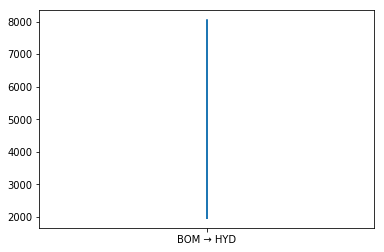

None
Airline            21
Date_of_Journey    21
Source             21
Destination        21
Route              21
Dep_Time           21
Arrival_Time       21
Duration           21
Total_Stops        21
Additional_Info    21
Price              21
dtype: int64


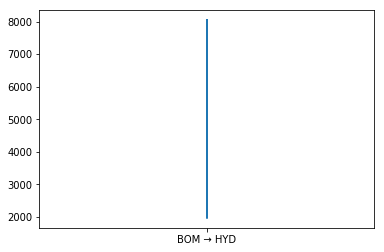

None
Airline            21
Date_of_Journey    21
Source             21
Destination        21
Route              21
Dep_Time           21
Arrival_Time       21
Duration           21
Total_Stops        21
Additional_Info    21
Price              21
dtype: int64


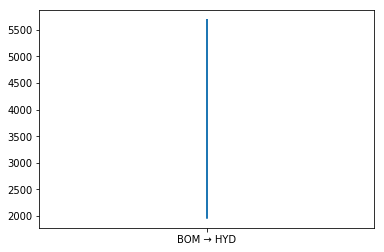

None
Airline            28
Date_of_Journey    28
Source             28
Destination        28
Route              28
Dep_Time           28
Arrival_Time       28
Duration           28
Total_Stops        28
Additional_Info    28
Price              28
dtype: int64


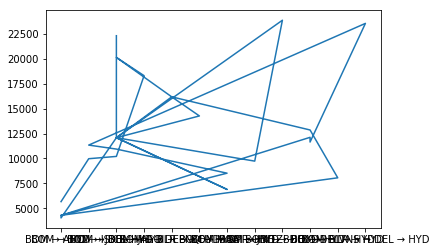

None
Airline            23
Date_of_Journey    23
Source             23
Destination        23
Route              23
Dep_Time           23
Arrival_Time       23
Duration           23
Total_Stops        23
Additional_Info    23
Price              23
dtype: int64


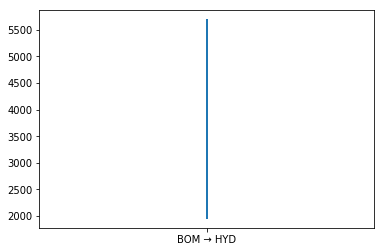

None
Airline            19
Date_of_Journey    19
Source             19
Destination        19
Route              19
Dep_Time           19
Arrival_Time       19
Duration           19
Total_Stops        19
Additional_Info    19
Price              19
dtype: int64


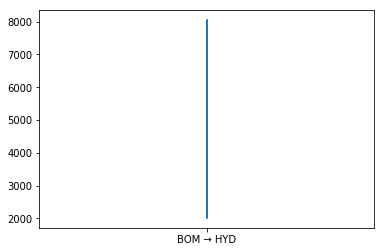

None
Airline            24
Date_of_Journey    24
Source             24
Destination        24
Route              24
Dep_Time           24
Arrival_Time       24
Duration           24
Total_Stops        24
Additional_Info    24
Price              24
dtype: int64


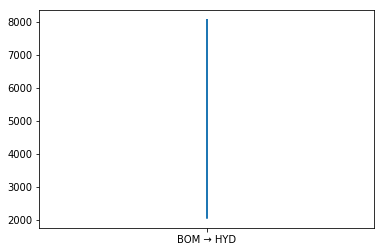

None
Airline            15
Date_of_Journey    15
Source             15
Destination        15
Route              15
Dep_Time           15
Arrival_Time       15
Duration           15
Total_Stops        15
Additional_Info    15
Price              15
dtype: int64


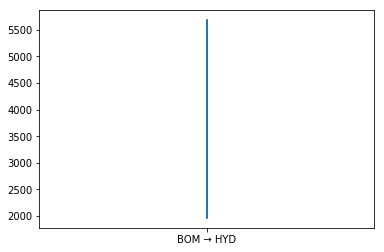

None
Airline            20
Date_of_Journey    20
Source             20
Destination        20
Route              20
Dep_Time           20
Arrival_Time       20
Duration           20
Total_Stops        20
Additional_Info    20
Price              20
dtype: int64


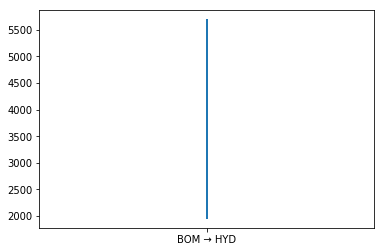

None
Airline            26
Date_of_Journey    26
Source             26
Destination        26
Route              26
Dep_Time           26
Arrival_Time       26
Duration           26
Total_Stops        26
Additional_Info    26
Price              26
dtype: int64


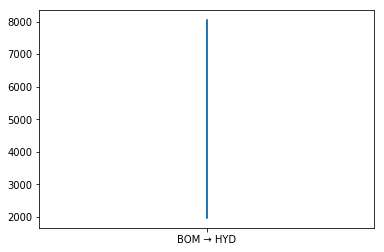

None
Airline            19
Date_of_Journey    19
Source             19
Destination        19
Route              19
Dep_Time           19
Arrival_Time       19
Duration           19
Total_Stops        19
Additional_Info    19
Price              19
dtype: int64


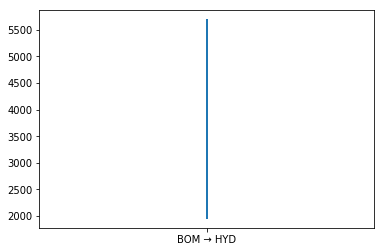

None
Airline            26
Date_of_Journey    26
Source             26
Destination        26
Route              26
Dep_Time           26
Arrival_Time       26
Duration           26
Total_Stops        26
Additional_Info    26
Price              26
dtype: int64


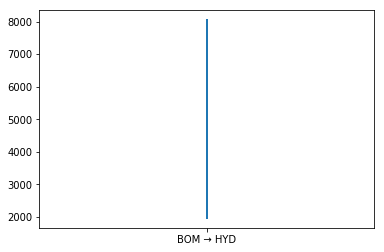

None
Airline            22
Date_of_Journey    22
Source             22
Destination        22
Route              22
Dep_Time           22
Arrival_Time       22
Duration           22
Total_Stops        22
Additional_Info    22
Price              22
dtype: int64


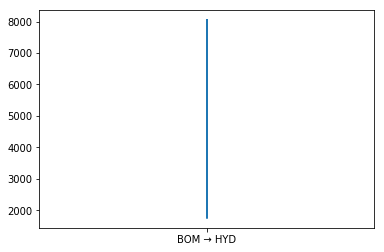

None
Airline            23
Date_of_Journey    23
Source             23
Destination        23
Route              23
Dep_Time           23
Arrival_Time       23
Duration           23
Total_Stops        23
Additional_Info    23
Price              23
dtype: int64


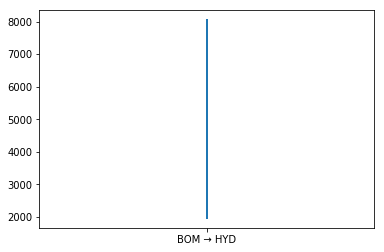

None
Airline            23
Date_of_Journey    23
Source             23
Destination        23
Route              23
Dep_Time           23
Arrival_Time       23
Duration           23
Total_Stops        23
Additional_Info    23
Price              23
dtype: int64


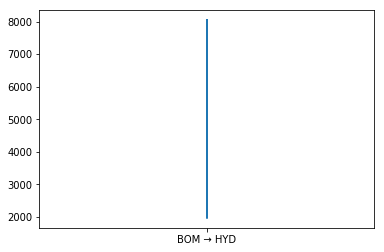

None
Airline            23
Date_of_Journey    23
Source             23
Destination        23
Route              23
Dep_Time           23
Arrival_Time       23
Duration           23
Total_Stops        23
Additional_Info    23
Price              23
dtype: int64


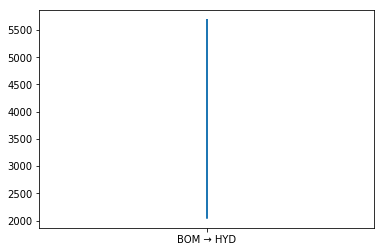

None
Airline            22
Date_of_Journey    22
Source             22
Destination        22
Route              22
Dep_Time           22
Arrival_Time       22
Duration           22
Total_Stops        22
Additional_Info    22
Price              22
dtype: int64


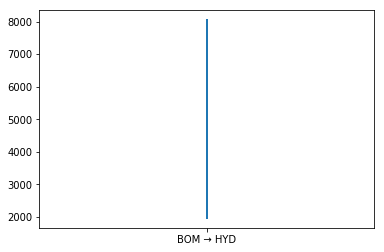

None
Airline            20
Date_of_Journey    20
Source             20
Destination        20
Route              20
Dep_Time           20
Arrival_Time       20
Duration           20
Total_Stops        20
Additional_Info    20
Price              20
dtype: int64


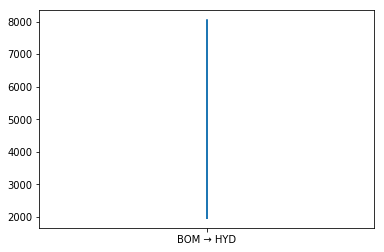

None
Airline            22
Date_of_Journey    22
Source             22
Destination        22
Route              22
Dep_Time           22
Arrival_Time       22
Duration           22
Total_Stops        22
Additional_Info    22
Price              22
dtype: int64


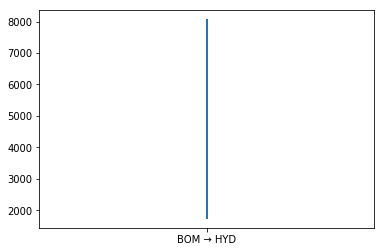

None
Airline            21
Date_of_Journey    21
Source             21
Destination        21
Route              21
Dep_Time           21
Arrival_Time       21
Duration           21
Total_Stops        21
Additional_Info    21
Price              21
dtype: int64


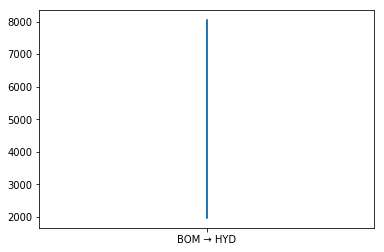

None
Airline            21
Date_of_Journey    21
Source             21
Destination        21
Route              21
Dep_Time           21
Arrival_Time       21
Duration           21
Total_Stops        21
Additional_Info    21
Price              21
dtype: int64


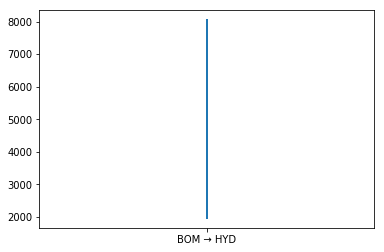

None
Airline            17
Date_of_Journey    17
Source             17
Destination        17
Route              17
Dep_Time           17
Arrival_Time       17
Duration           17
Total_Stops        17
Additional_Info    17
Price              17
dtype: int64


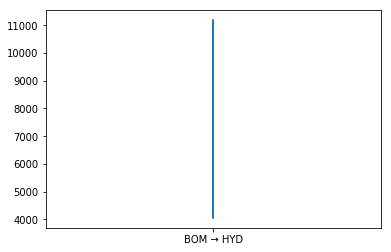

None
Airline            22
Date_of_Journey    22
Source             22
Destination        22
Route              22
Dep_Time           22
Arrival_Time       22
Duration           22
Total_Stops        22
Additional_Info    22
Price              22
dtype: int64


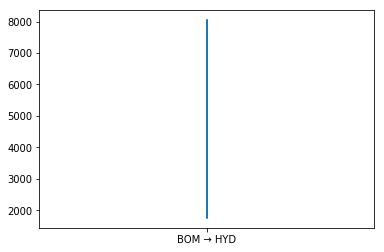

None
Airline            15
Date_of_Journey    15
Source             15
Destination        15
Route              15
Dep_Time           15
Arrival_Time       15
Duration           15
Total_Stops        15
Additional_Info    15
Price              15
dtype: int64


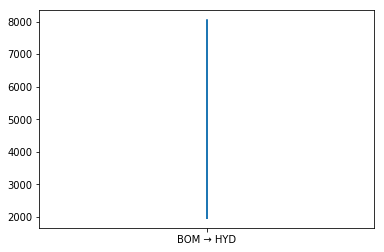

None
Airline            18
Date_of_Journey    18
Source             18
Destination        18
Route              18
Dep_Time           18
Arrival_Time       18
Duration           18
Total_Stops        18
Additional_Info    18
Price              18
dtype: int64


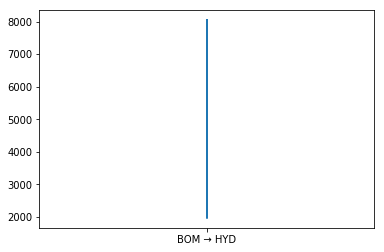

None
Airline            61
Date_of_Journey    61
Source             61
Destination        61
Route              61
Dep_Time           61
Arrival_Time       61
Duration           61
Total_Stops        61
Additional_Info    61
Price              61
dtype: int64


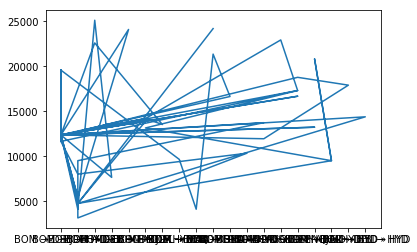

None
Airline            21
Date_of_Journey    21
Source             21
Destination        21
Route              21
Dep_Time           21
Arrival_Time       21
Duration           21
Total_Stops        21
Additional_Info    21
Price              21
dtype: int64


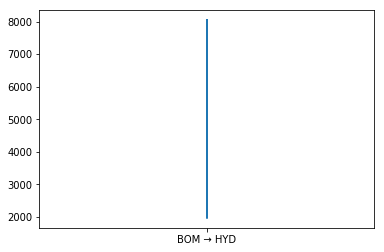

None
Airline            21
Date_of_Journey    21
Source             21
Destination        21
Route              21
Dep_Time           21
Arrival_Time       21
Duration           21
Total_Stops        21
Additional_Info    21
Price              21
dtype: int64


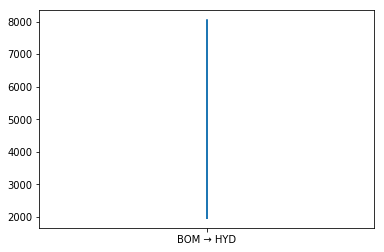

None
Airline            11
Date_of_Journey    11
Source             11
Destination        11
Route              11
Dep_Time           11
Arrival_Time       11
Duration           11
Total_Stops        11
Additional_Info    11
Price              11
dtype: int64


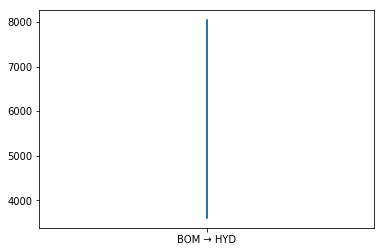

None
Airline            22
Date_of_Journey    22
Source             22
Destination        22
Route              22
Dep_Time           22
Arrival_Time       22
Duration           22
Total_Stops        22
Additional_Info    22
Price              22
dtype: int64


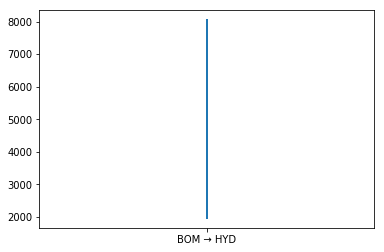

None
Airline            20
Date_of_Journey    20
Source             20
Destination        20
Route              20
Dep_Time           20
Arrival_Time       20
Duration           20
Total_Stops        20
Additional_Info    20
Price              20
dtype: int64


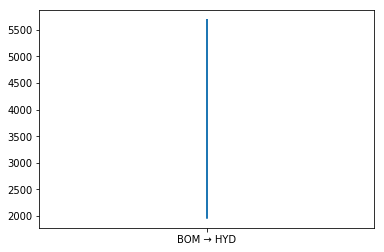

None


In [115]:
for index in a.index:
    subset = input[(input.Source == a.Source[index]) & (input.Destination == a.Destination[index])]
    dates = sorted(subset.Date_of_Journey.unique())
    for date in dates:
        sub = subset[subset.Date_of_Journey == date]
        print(sub.count())
        plt.plot(sub.Route, sub.Price)
        #plt.title(date + sub.Source.unique() + sub.Destination.unique(), sub.Price)
        print(plt.show())
    
#     plt.plot(subset.Date_of_Journey,subset.Price)
#     plt.title(subset.Source.unique())
#     print(plt.show())